## YAHYA KOCAKALE
## ID: 2303099

## Task 1

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
price_data = pd.read_csv("https://osf.io/p6tyr/download") #access the data
features_data = pd.read_csv("https://osf.io/utwjs/download")

In [64]:
price_data.columns

Index(['hotel_id', 'price', 'offer', 'offer_cat', 'year', 'month', 'weekend',
       'holiday', 'nnights', 'scarce_room'],
      dtype='object')

In [65]:
features_data.columns

Index(['hotel_id', 'city', 'distance', 'stars', 'rating', 'country',
       'city_actual', 'rating_reviewcount', 'center1label', 'center2label',
       'neighbourhood', 'ratingta', 'ratingta_count', 'distance_alter',
       'accommodation_type'],
      dtype='object')

### Task 1.1: Combine the two dataframes

In [66]:
combined_data = pd.merge(price_data, features_data, on='hotel_id')

In [67]:
unique_cities = combined_data['city'].unique()

# Print the unique values
print(unique_cities)

['Amsterdam' 'Athens' 'Barcelona' 'Belgrade' 'Berlin' 'Birmingham'
 'Bratislava' 'Brussels' 'Bucharest' 'Budapest' 'Copenhagen' 'Dublin'
 'Dubrovnik' 'Glasgow' 'Hamburg' 'Helsinki' 'Istanbul' 'Kiev' 'Krakow'
 'Lisbon' 'London' 'Lyon' 'Madrid' 'Marseille' 'Milan' 'Minsk' 'Moscow'
 'Munich' 'Naples' 'Paris' 'Prague' 'Riga' 'Rome' 'Rotterdam' 'Salzburg'
 'Samara' 'Seville' 'Sofia' 'St. Petersburg' 'Stockholm' 'Tallin'
 'Valetta' 'Vienna' 'Vilnius' 'Warsaw' 'Zagreb']


In [68]:
len(combined_data[combined_data['city'] == 'Istanbul']) #Select a single city

11945

In [69]:
combined_data = combined_data[combined_data['city'] == 'Istanbul']

In [70]:
combined_data.shape

(11945, 24)

### Task 1.2: Create a binary variable 'highly_rated'

In [71]:
combined_data['highly_rated'] = (combined_data['rating'] >= 4).astype(int)

### Task 1.3: Examine the relationship between 'highly_rated' and other features

In [72]:
# Groupby to calculate the average values for selected features based on 'highly_rated'

avg_values = combined_data.groupby('highly_rated')[['stars','price','distance']].mean()

# Display the average values for each feature
print(avg_values)

                 stars       price  distance
highly_rated                                
0             3.492623   90.949002  1.803814
1             3.980792  114.501931  2.039691


It seems that high rating for hotels in Istanbul incrase as the `stars` of the hotels increase (also `price` and `distance` seem positively correlated). 

### Task 1.4: Filter the data

In [73]:
filtered_data = combined_data[combined_data['accommodation_type'] == 'Hotel']  # Accommodation type is hotel
filtered_data = combined_data.dropna(subset=['rating', 'stars', 'price','distance']) # Remove rows with NA

In [74]:
# Check for outliers and remove them (remove values over 95th percentile in the dataframe)
filtered_data = filtered_data[filtered_data['price'] < filtered_data['price'].quantile(0.95)]

In [75]:
filtered_data.shape

(4851, 25)

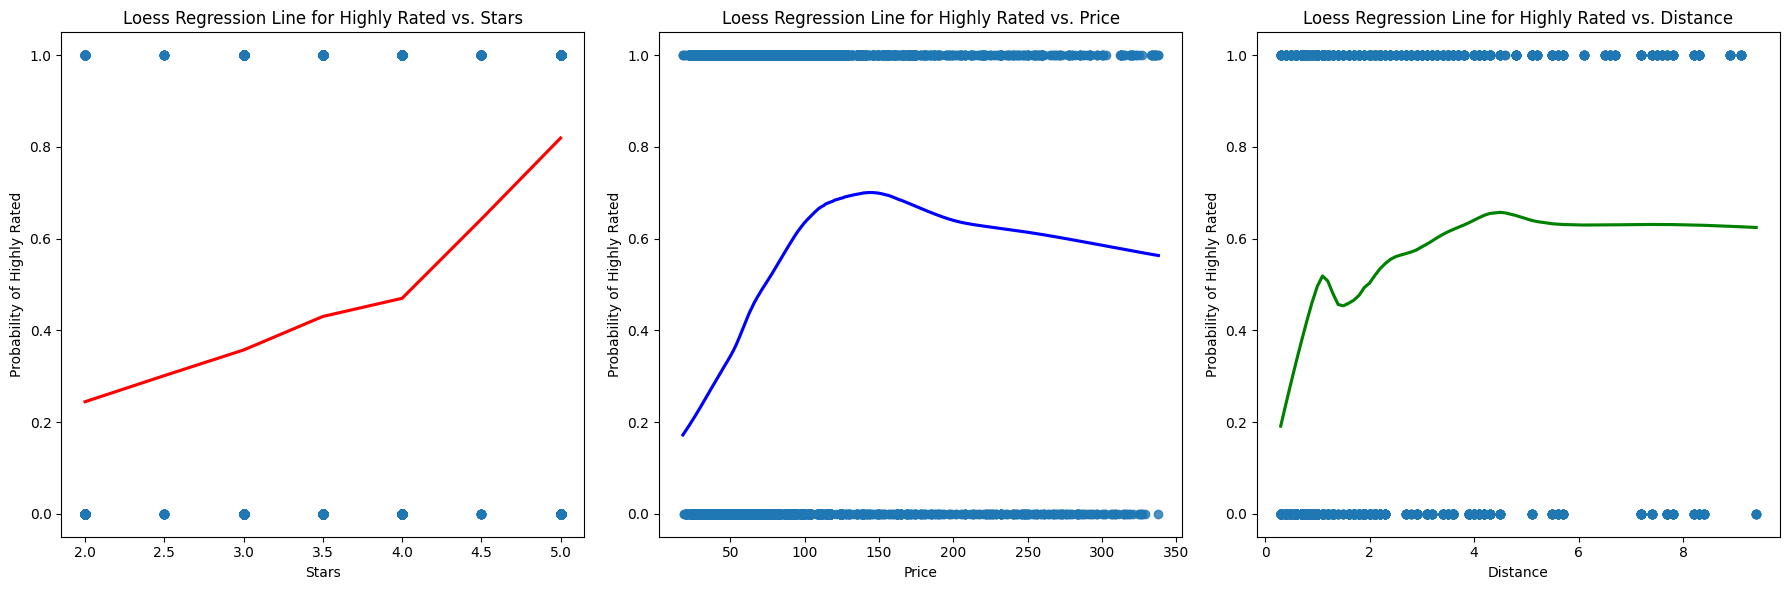

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt


# Plot the line graph for "stars" vs "highly_rated" using the loess method
plt.figure(figsize=(18, 6))

# Subplot for "stars"
plt.subplot(1, 3, 1)
sns.regplot(x='stars', y='highly_rated', data=filtered_data, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Stars')
plt.ylabel('Probability of Highly Rated')
plt.title('Loess Regression Line for Highly Rated vs. Stars')

# Subplot for "price"
plt.subplot(1, 3, 2)
sns.regplot(x='price', y='highly_rated', data=filtered_data, lowess=True, line_kws={'color': 'blue'})
plt.xlabel('Price')
plt.ylabel('Probability of Highly Rated')
plt.title('Loess Regression Line for Highly Rated vs. Price')

# Subplot for "distance"
plt.subplot(1, 3, 3)
sns.regplot(x='distance', y='highly_rated', data=filtered_data, lowess=True, line_kws={'color': 'green'})
plt.xlabel('Distance')
plt.ylabel('Probability of Highly Rated')
plt.title('Loess Regression Line for Highly Rated vs. Distance')

plt.tight_layout()
plt.show()

In particular, the `stars` variable seems to be positively related to high ratings, and the level of this relationship seems to increase even more after 4 stars. In this case, it may be appropriate to use separate splines for the two regions. The variables `price` and `distance` seem uncorelated with high rating after a certain level.

### Task 1.5: Estimate linear probability, logit, and probit models

In [77]:
import statsmodels.api as sm
import patsy
#Define explanatory variables
X = filtered_data[['distance', 'stars', 'price']]
# Add a constant term for the intercept
X = sm.add_constant(X)
# Define the dependent variable
y = filtered_data['highly_rated']

In [78]:
# Estimate linear probability model
linear_model = sm.OLS(y, X).fit()

In [79]:
# Estimate logit model
logit_model = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.644441
         Iterations 5


In [80]:
# Estimate probit model
probit_model = sm.Probit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.644503
         Iterations 5


In [81]:
# Display results
print("Linear Probability Model:")
print(linear_model.summary())

print("\nLogit Model:")
print(logit_model.summary())

print("\nProbit Model:")
print(probit_model.summary())

Linear Probability Model:
                            OLS Regression Results                            
Dep. Variable:           highly_rated   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     163.5
Date:                Thu, 07 Dec 2023   Prob (F-statistic):          5.99e-101
Time:                        01:20:38   Log-Likelihood:                -3283.0
No. Observations:                4851   AIC:                             6574.
Df Residuals:                    4847   BIC:                             6600.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1438     

In [82]:
# Calculate marginal effects for logit and probit models
logit_marginal_effects = logit_model.get_margeff()
probit_marginal_effects = probit_model.get_margeff()

In [83]:
# Display marginal effects
print("\nLogit Marginal Effects:")
print(logit_marginal_effects.summary())

print("\nProbit Marginal Effects:")
print(probit_marginal_effects.summary())


Logit Marginal Effects:
        Logit Marginal Effects       
Dep. Variable:           highly_rated
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
distance       0.0209      0.004      5.190      0.000       0.013       0.029
stars          0.1323      0.009     14.712      0.000       0.115       0.150
price          0.0009      0.000      8.102      0.000       0.001       0.001

Probit Marginal Effects:
       Probit Marginal Effects       
Dep. Variable:           highly_rated
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
distance       0.0206      0.004      5.188      0.000       0.013       0.028
stars        

In [84]:
# Combine results into a comparison table
comparison_table = pd.DataFrame({
    'Linear Coefficients': linear_model.params[1:4],
    'Logit Marginal Effects': logit_model.get_margeff().margeff,
    'Probit Marginal Effects': probit_model.get_margeff().margeff
})

# Display the comparison table
print(comparison_table)

          Linear Coefficients  Logit Marginal Effects  Probit Marginal Effects
distance             0.021025                0.020858                 0.020599
stars                0.134321                0.132347                 0.132976
price                0.000944                0.000941                 0.000937


In [85]:
from tabulate import tabulate
# Convert the comparison table to a nicely formatted string
table_str = tabulate(comparison_table, headers='keys', tablefmt='fancy_grid')

# Display the formatted table
print(table_str)

╒══════════╤═══════════════════════╤══════════════════════════╤═══════════════════════════╕
│          │   Linear Coefficients │   Logit Marginal Effects │   Probit Marginal Effects │
╞══════════╪═══════════════════════╪══════════════════════════╪═══════════════════════════╡
│ distance │           0.0210246   │              0.0208581   │               0.0205986   │
├──────────┼───────────────────────┼──────────────────────────┼───────────────────────────┤
│ stars    │           0.134321    │              0.132347    │               0.132976    │
├──────────┼───────────────────────┼──────────────────────────┼───────────────────────────┤
│ price    │           0.000944308 │              0.000941365 │               0.000937259 │
╘══════════╧═══════════════════════╧══════════════════════════╧═══════════════════════════╛


In [86]:
# Generate predictions
linear_predictions = linear_model.predict(X)
logit_predictions = logit_model.predict(X)
probit_predictions = probit_model.predict(X)

In [87]:
# Calculate Brier score and Log-loss
from sklearn.metrics import brier_score_loss, log_loss

brier_score_linear = brier_score_loss(y, linear_predictions)
brier_score_logit = brier_score_loss(y, logit_predictions)
brier_score_probit = brier_score_loss(y, probit_predictions)

log_loss_linear = log_loss(y, linear_predictions)
log_loss_logit = log_loss(y, logit_predictions)
log_loss_probit = log_loss(y, probit_predictions)

# Extract relevant statistics (Pseudo R-squared metric is used for logit and probit models)
linear_stats = {'R-squared': linear_model.rsquared, 'Brier Score': brier_score_linear, 'Log-loss': log_loss_linear}
logit_stats = {'R-squared': logit_model.prsquared, 'Brier Score': brier_score_logit, 'Log-loss': log_loss_logit}
probit_stats = {'R-squared': probit_model.prsquared, 'Brier Score': brier_score_probit, 'Log-loss': log_loss_probit}

In [88]:
# Create a DataFrame for the table of Statistics of goodness of fit for probability predictions models

statistics_table = pd.DataFrame({
    'Linear Model': linear_stats,
    'Logit Model': logit_stats,
    'Probit Model': probit_stats
})

# Convert the statistics table to a nicely formatted string
table_str2 = tabulate(statistics_table, headers='keys', tablefmt='fancy_grid')

# Display the formatted table
print(table_str2)

╒═════════════╤════════════════╤═══════════════╤════════════════╕
│             │   Linear Model │   Logit Model │   Probit Model │
╞═════════════╪════════════════╪═══════════════╪════════════════╡
│ R-squared   │      0.0918885 │     0.0691604 │      0.0690707 │
├─────────────┼────────────────┼───────────────┼────────────────┤
│ Brier Score │      0.226653  │     0.226497  │      0.226515  │
├─────────────┼────────────────┼───────────────┼────────────────┤
│ Log-loss    │      0.645434  │     0.644441  │      0.644503  │
╘═════════════╧════════════════╧═══════════════╧════════════════╛


In [89]:
# Predict probabilities for all models

linear_probs = linear_model.predict(X)
logit_probs = logit_model.predict(X)
probit_probs = probit_model.predict(X)

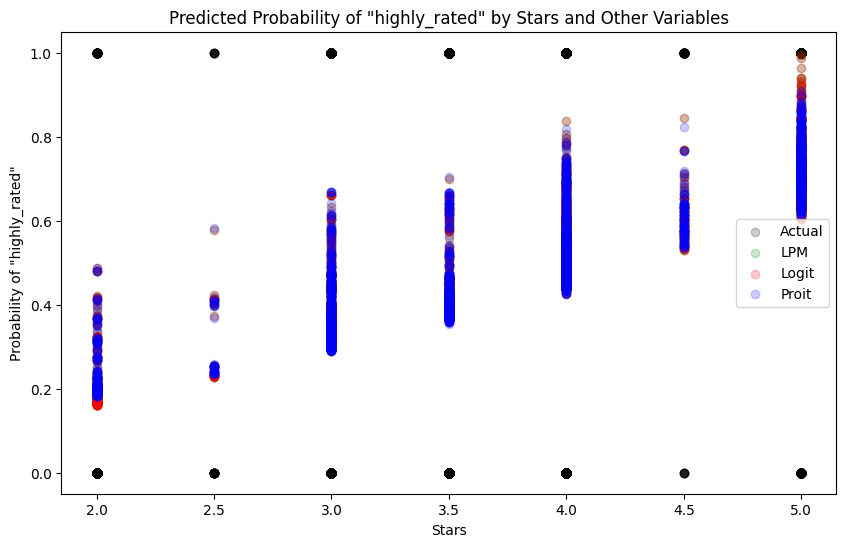

In [90]:
# Plot a scatterplot
plt.figure(figsize=(10, 6))

plt.scatter(filtered_data['stars'], y, color='black', alpha=0.2, label='Actual')
plt.scatter(filtered_data['stars'], linear_probs, color='green', alpha=0.2, label='LPM')
plt.scatter(filtered_data['stars'], linear_probs, color='red', alpha=0.2, label='Logit')
plt.scatter(filtered_data['stars'], probit_probs, color='blue', alpha=0.2, label='Proit')

plt.xlabel('Stars')
plt.ylabel('Probability of "highly_rated"')
plt.legend()
plt.title('Predicted Probability of "highly_rated" by Stars and Other Variables')

plt.show()

All three models give very similar predicted values for given hotel star values. And the positive correlation is visible from the scatter plot (Probabilities are mostly overlapping)

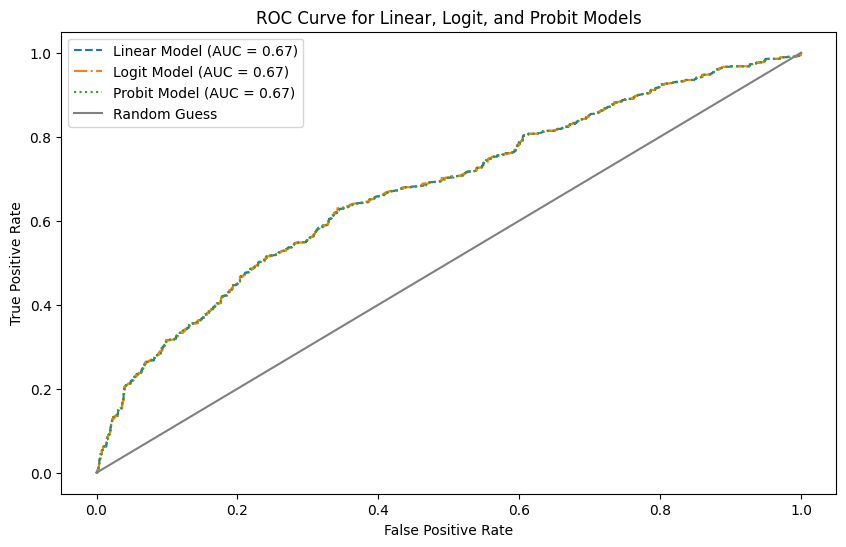

In [91]:
# Compute ROC curve and AUC for all models
from sklearn.metrics import roc_curve, auc

fpr_linear, tpr_linear, _ = roc_curve(y, linear_probs)
roc_auc_linear = auc(fpr_linear, tpr_linear)

fpr_logit, tpr_logit, _ = roc_curve(y, logit_probs)
roc_auc_logit = auc(fpr_logit, tpr_logit)

fpr_probit, tpr_probit, _ = roc_curve(y, probit_probs)
roc_auc_probit = auc(fpr_probit, tpr_probit)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_linear, tpr_linear, label=f'Linear Model (AUC = {roc_auc_linear:.2f})', linestyle='--')
plt.plot(fpr_logit, tpr_logit, label=f'Logit Model (AUC = {roc_auc_logit:.2f})', linestyle='-.')
plt.plot(fpr_probit, tpr_probit, label=f'Probit Model (AUC = {roc_auc_probit:.2f})', linestyle=':')

plt.plot([0, 1], [0, 1], linestyle='-', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Linear, Logit, and Probit Models')
plt.legend()
plt.show()

An AUC of 0.67 suggests that the model has some discriminatory power, but it is not highly accurate.
It indicates a moderate ability of the model to distinguish between the positive and negative classes.

In [92]:
filtered_data["linear_probs"] = linear_probs
filtered_data["logit_probs"] = linear_probs
filtered_data["probit_probs"] = linear_probs

filtered_data.groupby("highly_rated")[
    [ "linear_probs", "logit_probs", "probit_probs"
]].mean().round(3)

,linear_probs,logit_probs,probit_probs
highly_rated,,,
0,0.436,0.436,0.436
1,0.528,0.528,0.528


All three models show similar probability differences between groups.